<a href="https://colab.research.google.com/github/flavio-mota/perceptron/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementação de um Perceptron utilizando Python





O objetivo deste notebook jupyter é apresentar uma implementação de um Perceptron nos moldes da biblioteca `scikit-learn`. Como aplicação do modelo, iremos classificar diferentes espécies de flores do conjunto Iris e outras duas bases de dados.

## Implementando um perceptron com Python

In [1]:
## uma das bibliotecas matemáticas do python
import numpy as np

## A classe Perceptron

In [2]:
class Perceptron(object):
    """Perceptron
    
    Parâmetros
    ----------------
    eta : float
        Taxa de Aprendizagem - entre 0.0 e 1.0
    n_iter : int
        Número de iterações (épocas) sob o conjunto de dados de treino.
    random_state : int
        Semente do gerador de números aleatórios para inicialização
        pesos.
    
    Atributos
    ----------------
    w_ : 1d-array
        Armazena os pesos depois do aprendizado.
    errors_ : list
        Número de classificações erradas em cada época.
    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Aprende com os dados de treino.
        
        Parâmetros
        ----------------
        X : {array-like}, formato = {n_amostras, n_atributos}
            Vetores de treinamento, onde n_amostras é o número de amostras
            do conjunto de dados e n_atributos é o número de 
            atributos do conjunto.
        y : array-like, formato = [n_amostras]
            Valores objetivo.
        
        Retorna
        ----------------
        self: object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                             size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calcula a entrada da rede."""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Retorna o rótulo da classe utilizando função degrau."""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Classificando com o Perceptron

Vamos utilizar a biblioteca `pandas` para armazenar os dados tabulados da base de dados [Iris](https://archive.ics.uci.edu/ml/datasets/Iris). 

Este é talvez o banco de dados mais conhecido que pode ser encontrado na literatura de reconhecimento de padrões. O conjunto de dados contém 3 classes de 50 instâncias cada, onde cada classe se refere a um tipo de planta Iris. Uma classe é linearmente separável das outras 2; os últimos NÃO são linearmente separáveis uns dos outros.

In [3]:
#Importamos a biblioteca pandas
import pandas as pd

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None) #Lemos a base
df.tail() #Exibimos o fim do conjunto

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Vamos trabalhar com apenas dois dos quatro atributos da base de dados, pois assim conseguimos observar a distribuição dos valores em um espaço bidimensional.

Vamos visualizar parte do conjunto de dados que nos interessa. Para isso, utilizaremos a biblioteca `matplotlib`.


In [5]:
#Importamos a matplotlib
import matplotlib.pyplot as plt

Vamos obter os valores de saída (y) e de entrada (X):

In [6]:
y = df.iloc[0:100, 4].values 
# Vamos convertes os valores das classes em valores 1 ou -1.
# A classe 'Iris-setosa' será -1 e o restante 1
y = np.where(y == 'Iris-setosa', -1, 1)

In [7]:
X = df.iloc[0:100, [0,2]].values

Vamos ver a distribuição desses dados:

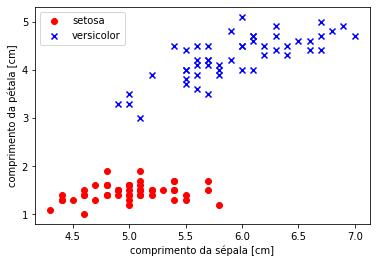

In [8]:
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='versicolor')
plt.xlabel('comprimento da sépala [cm]')
plt.ylabel('comprimento da pétala [cm]')
plt.legend(loc='upper left')
plt.show()

Agora, vamos instanciar um objeto com a classe do Perceptron. Vamos empregar uma taxa de aprendizado (eta) de 0.1 e limitar o número de épocas (n_iter) a 10:

In [9]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y) ## Chamada do método que faz o treino, passando as entradas (X) e suas respectivas saídas (y)

Podemos observar quantas atualizações de pesos ocorreram em cada época do modelo:

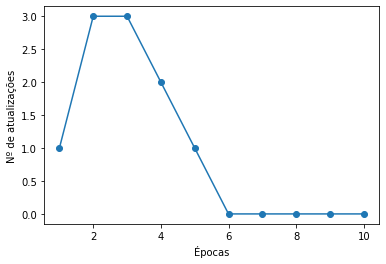

In [10]:
plt.plot(range(1, len(ppn.errors_) +1),
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

Podemos notar que, após 4 épocas, os pesos não sofreram nenhuma atualização, indicando a convergência do modelo.

Vamos utilizar agora uma biblioteca de visualização chamada `mlxtend` que traz diversos métodos de visualização que possibilitam plotar a chamada região de decisão do modelo. Isso vai nos permitir analisar como o modelo dividiu as classes:

In [11]:
# Importamos a biblioteca
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


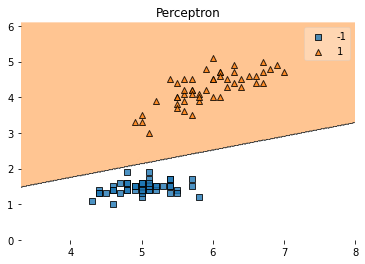

In [12]:
# Plotamos o gráfico
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.show()

Note como o Perceptron criou uma linha que consegue separar as classes corretamente as classes.

### Outros conjuntos

Vamos utilizar outro conjunto de dados para testar o Perceptron. A `scikit-learn` possibilita o uso de funções capazes de gerar conjuntos de dados artificiais. Para isso utilizaremos os módulos `make_blobs` e `make_moons`.

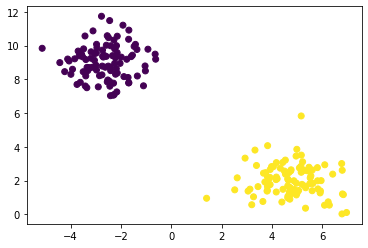

In [13]:
from sklearn.datasets import make_blobs
# Vamos criar 2 blobs com 200 amostras e 2 dimensões e 2 centros.
blobs = make_blobs(n_samples=200, n_features=2, centers=2, random_state=42)
# Em seguida, vamos plotar os dados gerados para visualização.
plt.scatter(blobs[0][:,0], blobs[0][:,1], c=blobs[1])
plt.show()

Vamos instanciar um Perceptron com uma taxa de aprendizado de 0.02 e um número de épocas igual a 10:

In [14]:
ppn = Perceptron(n_iter=10, eta=0.02)
X = blobs[0] # Entrada de dados
y = blobs[1] # Saída
# Apenas para substituir as classes 0 e 1 para 1 e -1
# A classe 1 é a que desejamos encontrar.
y[y == 0] = -1
ppn.fit(X, y) # Treinar

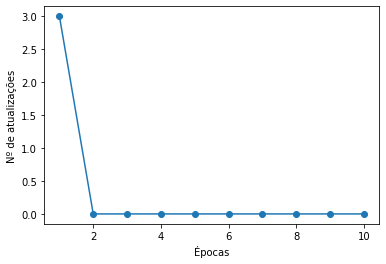

In [15]:
plt.plot(range(1, len(ppn.errors_) +1),
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

Com apenas 2 épocas o Perceptron já convergiu.

Vamos ver a fronteira de decisão criada:

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


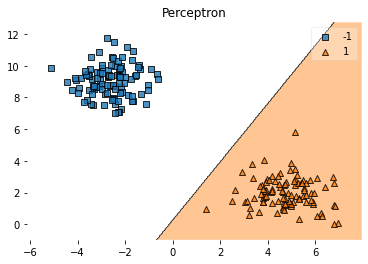

In [16]:
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.show()

Vamos criar um conjunto de dados agora com uma distribuição diferente:

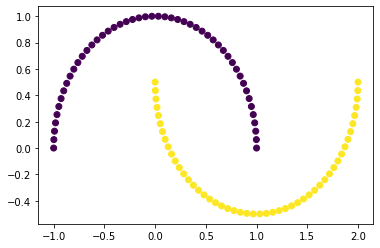

In [17]:
from sklearn.datasets import make_moons
# Vamos criar o conjunto com 100 amostras
moons = make_moons(n_samples=100)
plt.scatter(moons[0][:,0], moons[0][:,1], c=moons[1])
plt.show()

Vamos criar o Perceptron com uma taxa de aprendizado de 0.5 e com 10 épocas:

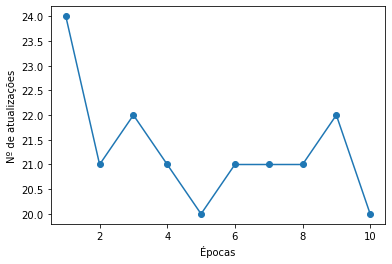

In [18]:
ppn = Perceptron(n_iter=10, eta=0.5)
X = moons[0]
y = moons[1]
# Apenas para substituir as classes 0 e 1 para 1 e -1
# A classe 1 é a que desejamos encontrar.
y[y == 0] = -1
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) +1),
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

Com apenas 10 épocas o modelo não convergiu. Vamos tentar aumentar essa quantidade para 50:

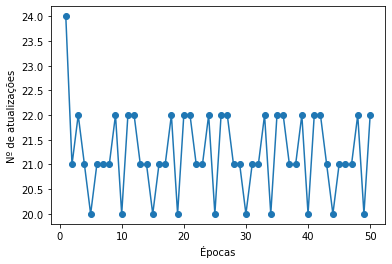

In [19]:
ppn = Perceptron(n_iter=50, eta=0.5)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) +1),
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

Mesmo assim o modelo não é capaz de convergir. Vamos observar a fronteira de decisão gerada:

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


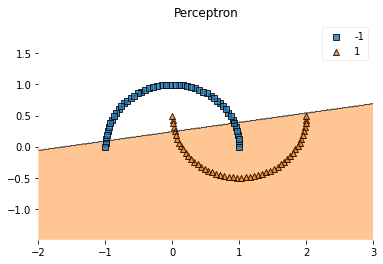

In [20]:
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.show()

As classes presentes nesse conjunto de dados possuem uma distribuição que impossibilita sua separação de forma linear. Sendo assim, o Perceptron tenta ajustar os pesos "infinitamente", já que ele não consegue convergir.